In [459]:
import numpy as np
from functools import reduce
import operator

def prod(iterable):
    return reduce(operator.mul, iterable, 1)

def lagrange_interpolation(x, y, z):
    res = np.longdouble(1)
    for (xi, yi) in zip(x, y):
        numerator = prod([np.longdouble(z - xj) if xi != xj else 1 for xj in x])
        denominator = prod([np.longdouble(xi - xj) if xi != xj else 1 for xj in x])
        res += yi * numerator /  denominator
    return res

In [460]:
import numpy as np

def fs(t):
    return np.longdouble(t) * np.longdouble(np.sin(2 * t))

def gen_uni_points(a, b, N):
    x = np.arange(a, b, 10 / N)
    return x

In [461]:
def get_error(x, a, b, func):
    y = [func(xi) for xi in x]
    t = np.arange(a, b, 0.01)
    expected = [func(ti) for ti in t]

    real = [lagrange_interpolation(x, y, ti) for ti in t]
    
    err = [abs(a - b) for (a, b) in zip(expected, real)]
    return t, err

In [462]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
def plot_lagrange_error(a, b, N):
    x = gen_uni_points(a, b, N) 
    t, err = get_error(x, a, b, f) 
    fig, ax = plt.subplots()
    
    ax.plot(t, err, color='blue')
    ax.set(xlabel='x', ylabel='err',
               title='Interpolation error for x sin(2x). N = ' + str(N))
    ax.grid()
    plt.show()

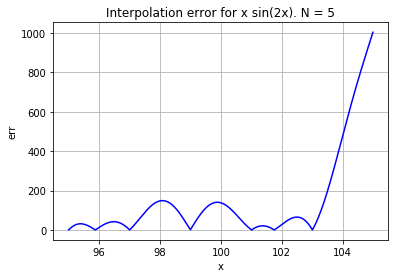

In [463]:
plot_lagrange_error(95, 105, 5)

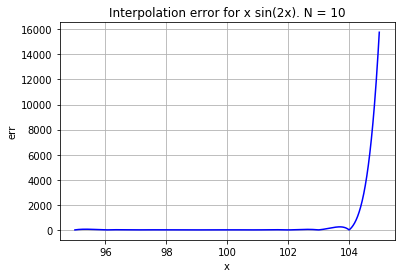

In [464]:
plot_lagrange_error(95, 105, 10)

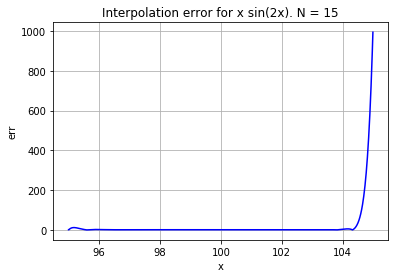

In [465]:
plot_lagrange_error(95, 105, 15)

У нас функция $x sin(2x)$ осциллирует и растёт не очень быстро, а многочлен растёт быстро, поэтому всё в интервале между первой и последней точкой приближается хорошо (чем больше точек, тем лучше приближается), а всё, что вне -- не очень.

In [466]:
def max_error(x, a, b, func):
    t, err = get_error(x, a, b, func)
    return max(err)

In [467]:
import matplotlib.pyplot as plt
import numpy as np
def plot_for_n(gen_points, func, a, b, title):
    nths = np.arange(5, 51)

    max_err = [max_error(gen_points(a, b, n), a, b, func) for n in nths]
    fig, ax = plt.subplots()

    ax.plot(nths, max_err, color='blue')
    ax.set(xlabel='N', ylabel='max err',
               title=title)
    ax.grid()
    plt.show() 

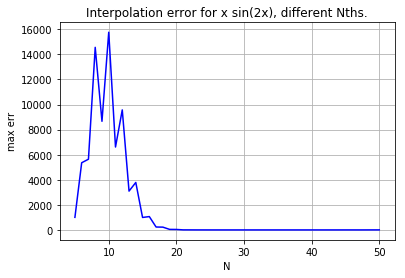

In [468]:
plot_for_n(gen_uni_points, fs, 95, 105, 'Interpolation error for x sin(2x), different Nths.')

In [469]:
def new_point(k, N, a, b):
    return a + (b - a) * np.cos(np.pi  * (2 * k - 1) / 2 / N)

def gen_chebyshev(a, b, N):
    return [new_point(k, N, a, b) for k in range(1, N + 1)]

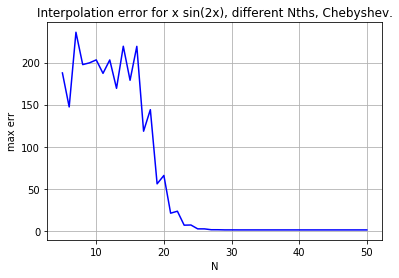

In [470]:
plot_for_n(gen_chebyshev, fs, 95, 105, 'Interpolation error for x sin(2x), different Nths, Chebyshev.')

In [471]:
def fm(t):
    return abs(t - 1)

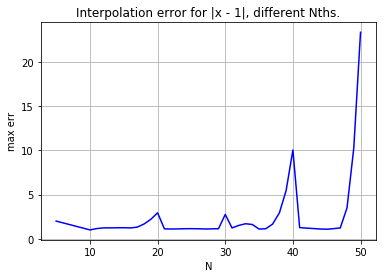

In [472]:
plot_for_n(gen_uni_points, fm, 0, 2, 'Interpolation error for |x - 1|, different Nths.')

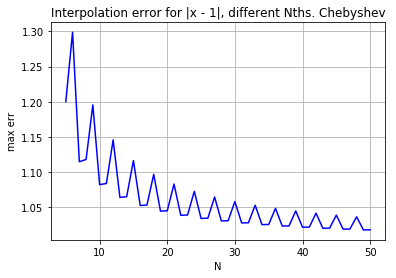

In [473]:
plot_for_n(gen_chebyshev, fm, 0, 2, 'Interpolation error for |x - 1|, different Nths. Chebyshev')